unit 2 / lesson 3 / project 4

The accuracy of my original model was:
* With 20% Holdout: 0.705
* Testing on Sample: 0.741

After revising the model, my accuracy is:    
* With 20% Holdout: 0.77
* Testing on Sample: 0.801    
    
I was able to improve the model by realizing that sensitivity was low, while specificity was high.  I was able to improve that by including more positive keywords.  

I also removed the requirement to have spaces around the keywords.  It was not too often a keyword was a subset of a larger keyword.  So there was little disandvantage to this.  However, it was often that words with additional punction, were at the begining/end, or of a slight variation were now correctly being identified.  

while I wanted to account for times when words such as "not" or "doesn't" were used in conjunction with other keywords. For instance, "not good" would be a negative feature.  But I had to make sure in that instnace, the "good" by itself was not also considered a feature.  This required triple nested for loops which would not run on my machine fast enough.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# use amazon data
# uncomment the other pd.read_csv line to change data source
# note:  the varible name "amazon_df" was already used too many times for me to want and change to a more robust name, such as "reviews_df"

amazon_df = pd.read_csv('amazon_cells_labelled.txt', sep='\t', lineterminator='\n', header=None)
# amazon_df = pd.read_csv('imdb_labelled.txt', sep='\t', lineterminator='\n', header=None)
amazon_df.columns = ["review", "sentiment"]
amazon_df.head(5)

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
pd.set_option('display.max_colwidth', 500)
# look for positive keywords
amazon_df.loc[amazon_df['sentiment'] == 1]

,review,sentiment
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1
11,He was very impressed when going from the original battery to the extended battery.,1
13,Very good quality though,1
15,Highly recommend for any one who has a blue tooth phone.,1
17,So Far So Good!.,1
18,Works great!.,1


In [4]:
# look for negative keywords
amazon_df.loc[amazon_df['sentiment'] == 0]

,review,sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0
12,If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.,0
14,"The design is very odd, as the ear ""clip"" is not very comfortable at all.",0
16,I advise EVERYONE DO NOT BE FOOLED!,0
19,It clicks into place in a way that makes you wonder how long that mechanism would last.,0


In [5]:
# simple keywords to look for 
keywords = ['useful', 'well', 'beautiul', 'simpl', 'comfortabl', 'good', 'great', 'pleas', 'work', 'poor', 'impress', 'quality', 'love', 'wonderful', 'best', 'recommend', 'nice', 'easy', 'excellent', 'happy', 'like', 'satisif', 'wow', 'unacceptible', 'hate', 'worthless', 'junk', 'garbage', 'bad', 'wrong', 'complain', 'fail', 'disappoint', 'waste', 'return', 'refund', 'problem', 'break', 'hard', 'negative', 'mistake', 'mislead', 'not ']

In [ ]:
# negatores = ["not ", "isn't ", "isnt ", "doesn't ", "doesnt ", "won't ", "wont "]  


this triple nested for loop take too long to run on myt computer :(

for index, row in amazon_df.iterrows():
    review = row['review']
    neg_truth = False 
    for key in keywords:
        amazon_df[index, str(key)] = False
        amazon_df[index, "neg"+str(key)] = False
        for neg in negatores:
            neg_key = neg + key
            if neg_key in review:
                neg_truth = True
        if neg_truth:
            amazon_df[index, "neg"+str(key)] = True
        else:
            if str(key) in review:
                amazon_df[index, str(key)] = True

In [13]:
for key in keywords:
    truth = amazon_df.review.str.contains(str(key), case=False )
    amazon_df[str(key)] = truth

In [14]:
couldnt = (amazon_df.review.str.contains("couldn", case=False )) | (amazon_df.review.str.contains("can't", case=False )) | (amazon_df.review.str.contains("cant", case=False ))

amazon_df['couldnt'] = couldnt

In [15]:
doesnt = (amazon_df.review.str.contains("doesnt", case=False )) | (amazon_df.review.str.contains("doesn't", case=False )) | (amazon_df.review.str.contains("didn't", case=False )) | (amazon_df.review.str.contains("didnt", case=False ))

amazon_df['doesnt'] = doesnt

In [16]:
isnt = (amazon_df.review.str.contains("isnt", case=False )) | (amazon_df.review.str.contains("isn't", case=False ))

amazon_df['isnt'] = isnt

In [17]:
wont = (amazon_df.review.str.contains("wont", case=False )) | (amazon_df.review.str.contains("won't", case=False ))

amazon_df['wont'] = wont

In [11]:
pd.set_option('display.max_columns', 500)
amazon_df

,review,sentiment,useful,well,beautiul,simpl,comfortabl,good,great,pleas,work,poor,impress,quality,love,wonderful,best,recommend,nice,easy,excellent,happy,like,satisif,wow,unacceptible,hate,worthless,junk,garbage,bad,wrong,complain,fail,disappoint,waste,return,refund,problem,break,hard,negative,mistake,mislead,not,couldnt,doesnt,isnt,wont
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up right to get decent volume.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
amazon_df.iloc[990]

review          I'm really disappointed all I have now is a charger that doesn't work.
sentiment                                                                            0
useful                                                                           False
well                                                                             False
beautiul                                                                         False
simpl                                                                            False
comfortabl                                                                       False
good                                                                             False
great                                                                            False
pleas                                                                            False
work                                                                              True
poor                                       

In [19]:
amazon_df['sentiment'] = (amazon_df['sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

amazon_df.head()

,review,sentiment,useful,well,beautiul,simpl,comfortabl,good,great,pleas,work,poor,impress,quality,love,wonderful,best,recommend,nice,easy,excellent,happy,like,satisif,wow,unacceptible,hate,worthless,junk,garbage,bad,wrong,complain,fail,disappoint,waste,return,refund,problem,break,hard,negative,mistake,mislead,not,couldnt,doesnt,isnt,wont
0,So there is no way for me to plug it in here in the US unless I go by a converter.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


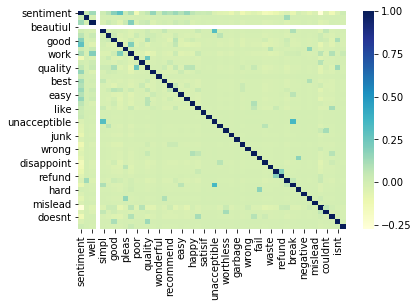

In [20]:
# make sure keywords are not highly correlated with eachother
sns.heatmap(amazon_df.corr(),cmap="YlGnBu")

In [21]:
data = amazon_df.drop(['review', 'sentiment'], axis=1)
target = amazon_df['sentiment']

In [22]:
# training input
data.head()

,useful,well,beautiul,simpl,comfortabl,good,great,pleas,work,poor,impress,quality,love,wonderful,best,recommend,nice,easy,excellent,happy,like,satisif,wow,unacceptible,hate,worthless,junk,garbage,bad,wrong,complain,fail,disappoint,waste,return,refund,problem,break,hard,negative,mistake,mislead,not,couldnt,doesnt,isnt,wont
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
# training output
target.head()

0    False
1     True
2     True
3    False
4     True
Name: sentiment, dtype: bool

In [24]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

In [25]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

In [26]:
# Fit our model to the data.
# Train the model to recognize correlations between the input
# and output
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [27]:
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [28]:
y_pred

array([False,  True,  True, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False, False,  True, False, False, False,  True,  True,
       False, False, False, False,  True, False, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True, False,  True, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False,  True, False,  True, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True, False, False,  True, False,  True, False, False,  True,
       False, False,

In [29]:
# percent accuracy
(1 - ((target != y_pred).sum() / data.shape[0])) 

0.8009999999999999

0.5


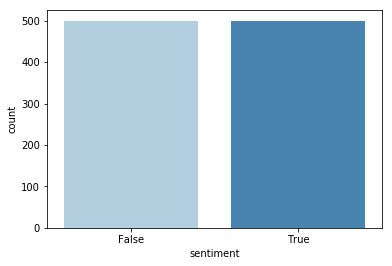

In [30]:
# null hypothesis
print(amazon_df[amazon_df.sentiment == True].shape[0] / data.shape[0])
sns.countplot(x = "sentiment", data = amazon_df, palette = "Blues");
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
print(pd.DataFrame(confusion_matrix(target, y_pred, labels=[True, False]), index=['true:positive', 'true:negative'], columns=['pred:positive', 'pred:negative']))

               pred:positive  pred:negative
true:positive            350            150
true:negative             49            451


This model often predicts a sentiment was negative when it was actually positve

It identifies negatives very well (too well), but seems there are too many negative keywords that are actually positve

In [33]:
print("original sensitivity was : ", 282/(282 + 218))
print("new sensitivity is : ", 350/(350 + 150))

original sensitivity was :  0.564
new sensitivity is :  0.7


In [34]:
print("original specificity was: ", 459/(41 + 459))
print("new specificity is: ", 451/(451 + 49))

original specificity was:  0.918
new specificity is:  0.902


In [35]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.77
Testing on Sample: 0.801


In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.85, 0.77, 0.85, 0.8 , 0.81, 0.68, 0.81, 0.73, 0.83, 0.78])

In [ ]:
revised_score = cross_val_score(bnb, data, target, cv=10)
revised_score

# modifications
Here I am looking for modifications to my original model
Then I will go back and make changes above according to these modifications

In [ ]:
# compare actual and predict values with data
amazon_df['predicted'] =  y_pred

In [ ]:
amazon_df.head(1)

In [ ]:
# we know the model often predicts a sentiment was negative when it was actually positive
# let's look at those situations
amazon_df[(amazon_df['predicted'] == False) & (amazon_df['sentiment'] == True) ]

In [ ]:
# how useful is "couldn't" and "doesn't"
# "Doesnt" true and accurate positive = 0
amazon_df[(amazon_df['Doesnt'] == True) & (amazon_df['predicted'] == True) & (amazon_df['sentiment'] == True) ]

In [ ]:
# "Doesnt" true and accurate negative = > 30
amazon_df[(amazon_df['Doesnt'] == True) & (amazon_df['predicted'] == False) & (amazon_df['sentiment'] == False) ]

In [ ]:
# "Doesnt" true and inaccurate positive = 2
amazon_df[(amazon_df['Doesnt'] == True) & (amazon_df['predicted'] == True) & (amazon_df['sentiment'] == False) ]

In [ ]:
# "Doesnt" true and inaccurate negative = 5
amazon_df[(amazon_df['Doesnt'] == True) & (amazon_df['predicted'] == False) & (amazon_df['sentiment'] == True) ]

* couldn't and doesn't accounts for more accurate results than inaccurate results.


**new keywords to consider:**
* useful
* well
* beautiul
* simple/simpler
* comfortable / comfortably
* pleased
* works
* poor 
* quality
* wonderful wonderfully


Origninally, keywords were identified as having a space before and after, this is to make sure words like "badge" are not found when looking for "bad"

However, there are some words I think it would be beneficial to avoid that strategy.  For instance, by searching for " comfortabl" we can identify both " comfortable" and " comfortably". Note the space at the begining to avoid "uncomfortable" 

This also allows words with punctuation like, "excellent!!!" to be regognized as "excellent"

We can create to seperate lists:
1. words that must have spaces before and after
2. words that only have a space before

**interactions with negators** 
" not ", " isn't ", "doesn't", " won't "  
adding these words before a keyword changes it's sentiment

of course we also have to include the incorrect spelling without the apostrophe 